In [107]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [108]:
df=pd.read_csv('bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [109]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [110]:
df = df[['age','job','marital','education','balance','housing','contact','day','month','duration','campaign','pdays','previous','poutcome','y']]

In [111]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


<h4>Data preparation</h4>

In [112]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<h3>Question 1
What is the most frequent observation (mode) for the column education?
unknown, primary, secondary, tertiary</h3>

In [113]:
df.education.mode()

0    secondary
Name: education, dtype: object

In [114]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

<h4>Most frequent observation(mode) for the column education is secondary</h4>

<h3> Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

age and balance
day and campaign
day and pdays
pdays and previous</h3>

In [115]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [116]:
df_numerical=df[['age','balance','day','duration','campaign','pdays','previous']]

In [117]:
df_numerical_corr= df_numerical.corr()

<Axes: >

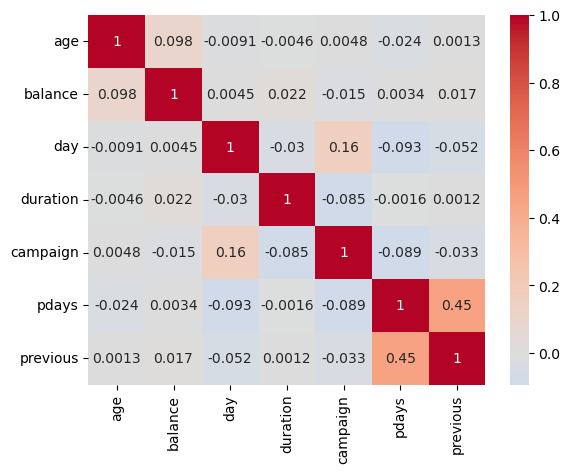

In [118]:
sns.heatmap(df_numerical_corr, annot=True, cmap="coolwarm", center=0)

<h4>The two features that have the biggewst correlation: pdays and previous</h4>

<h3>Target encoding
Now we want to encode the y variable.
Let's replace the values yes/no with 1/0.</h3>

In [119]:
df.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [120]:
df = df.replace({'y': {'yes': 1, 'no': 0}})

In [121]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


<h4>Split the data
Split your data in train/val/test sets with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value y is not in your dataframe.</h4>

In [122]:
from sklearn.model_selection import train_test_split

In [125]:
df_full_train, df_test=train_test_split(df,test_size=0.2, random_state=42)
df_train, df_val=train_test_split(df_full_train,test_size=0.25, random_state=42)

In [126]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [127]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [128]:
y_train=df_train.y.values
y_val=df_val.y.values
y_test=df_test.y.values

In [129]:
del df_train['y']
del df_val['y']
del df_test['y']

<h3>Question 3
Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).
Which of these variables has the biggest mutual information score? contact , education, housing, poutcome</h3>

In [138]:
df_train.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [161]:
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [162]:
from sklearn.metrics import mutual_info_score

In [163]:
mutual_info_score(df_full_train.y, df_full_train.job)

0.007765158514561027

In [164]:
mutual_info_score(df_full_train.marital, df_full_train.y)

0.0020189852528601504

In [165]:
mutual_info_score(df_full_train.education, df_full_train.y)

0.0024578282035066477

In [166]:
mutual_info_score(df_full_train.housing, df_full_train.y)

0.00980003813867901

In [167]:
mutual_info_score(df_full_train.contact, df_full_train.y)

0.014163614885003041

In [168]:
mutual_info_score(df_full_train.month, df_full_train.y)

0.024773565917283587

In [169]:
mutual_info_score(df_full_train.poutcome, df_full_train.y)

0.02925655626647966

In [170]:
def mutual_info_y_score(series):
    return mutual_info_score(series,df_full_train.y)

In [178]:
mi = df_full_train[categorical].apply(mutual_info_y_score)
mi.sort_values(ascending=False).round(2)

poutcome     0.03
month        0.02
contact      0.01
housing      0.01
job          0.01
education    0.00
marital      0.00
dtype: float64

<h4> Poutcome is the variable has the biggest mutual information score</h4>

<h3>Question 4
Now let's train a logistic regression.
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

0.6
0.7
0.8
0.9</h3>

In [180]:
from sklearn.feature_extraction import DictVectorizer

In [181]:
numerical= df_numerical

In [182]:
dv = DictVectorizer(sparse=False)

train_dicts= df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts= df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

TypeError: can only concatenate str (not "int") to str

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
z = np.linspace(-7,7,51)

In [ ]:
sigmoid(10000)

In [ ]:
plt.plot(z,sigmoid(z))

In [ ]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result=result + xi[j]*w[j]

    return result

In [ ]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j]*w[j]

    result = sigmoid(score)
    return result

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

<h3>3.4 EDA</h3>

In [210]:
df_full_train = df_full_train.reset_index(drop=True)

In [211]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [212]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [214]:
df_full_train.churn.mean()

0.26996805111821087

In [215]:
numerical=['tenure','monthlycharges','totalcharges']

In [216]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [40]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

<h3>3.5 Features Churn Rate and Risk Ratio</h3>

<h4>Churn rate</h4>

In [41]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [218]:
churn_female= df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [219]:
churn_male= df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [222]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [223]:
global_churn - churn_female

-0.006855983216553063

In [224]:
global_churn - churn_male

0.006754520462819769

In [48]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [225]:
churn_partner = df_full_train[df_full_train.partner =='yes'].churn.mean()
churn_partner

0.20503330866025166

In [226]:
global_churn - churn_partner

0.06493474245795922

In [227]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [228]:
global_churn - churn_no_partner

-0.05984095297455855

<h3>Risk ratio</h3>

In [229]:
churn_no_partner / global_churn

1.2216593879412643

In [53]:
churn_partner / global_churn

0.7594724924338315

In [ ]:
##### SELECT
#####  gender,
#####  AVG(churn),
#####  AVG(churn) - global_churn AS diff,
#####  AVG(churn) / global_churn AS risk
#####  FROM
#####  data
#####  GROUP BY
#####  gender;


In [230]:
from IPython.display import display

In [231]:
for c in categorical:
    print(c)
    df_group=df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff']=df_group['mean'] - global_churn
    df_group['risk']=df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


<h3>3.6 Feature importance: Mutual Information</h3>

In [232]:
from sklearn.metrics import mutual_info_score

In [233]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [234]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [235]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [236]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [237]:
def mutual_info_churn_score(series):
    return mutual_info_score(series,df_full_train.churn)

In [238]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

<h3>3.7 Feature Importance: Correlation</h3>

In [239]:
df_full_train.tenure.max()

72

In [241]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [242]:
df_full_train[df_full_train.tenure <=2].churn.mean()

0.5953420669577875

In [243]:
df_full_train[(df_full_train.tenure >2)&(df_full_train.tenure <=12)].churn.mean()

0.3994413407821229

In [244]:
df_full_train[df_full_train.tenure >12].churn.mean()

0.17634908339788277

In [245]:
df_full_train[df_full_train.monthlycharges <=20].churn.mean()

0.08795411089866156

In [246]:
df_full_train[(df_full_train.monthlycharges >20)&(df_full_train.monthlycharges <=50)].churn.mean()

0.18340943683409436

In [248]:
df_full_train[df_full_train.monthlycharges >50].churn.mean()

0.32499341585462205

<h3>3.8 One-hot encoding</h3>

In [250]:
from sklearn.feature_extraction import DictVectorizer

In [251]:
dv = DictVectorizer(sparse=False)

train_dicts= df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts= df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

<h3>3.9 Logistic regression</h3>

In [106]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [254]:
z = np.linspace(-7,7,51)

In [255]:
sigmoid(10000)

1.0

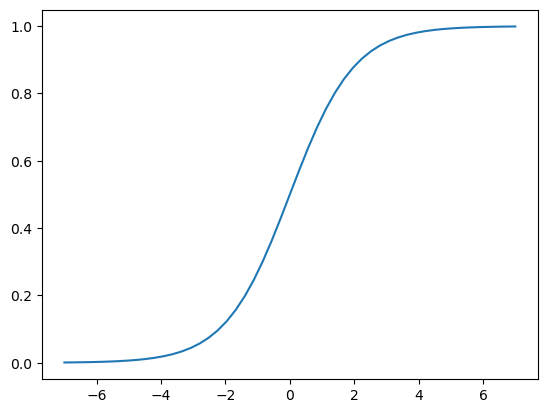

In [256]:
plt.plot(z,sigmoid(z))

In [257]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result=result + xi[j]*w[j]

    return result

In [259]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j]*w[j]

    result = sigmoid(score)
    return result
        

<h3>3.10 Training logistic regression with Scikit-Learn</h3>

In [260]:
from sklearn.linear_model import LogisticRegression

In [263]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\pimpo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [264]:
model.intercept_[0]

-0.10924048213915055

In [265]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.232,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.06 ,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.101, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.071,  0.   ])

In [266]:
y_pred = model.predict_proba(X_val)[:,1]

In [267]:
churn_decision=(y_pred >=0.5)

In [268]:
(y_val == churn_decision).mean()

0.8026969481902059

In [269]:
df_pred = pd.DataFrame()
df_pred['probability']=y_pred
df_pred['prediction']=churn_decision.astype(int)
df_pred['actual']=y_val

In [271]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [272]:
df_pred.correct.mean()

0.8026969481902059

In [273]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

<h3>3.11 Model interpretation</h3>

In [274]:
a=[1,2,3,4]
b='abcd'

In [275]:
dict(zip(a,b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [277]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.474,
 'contract=one_year': -0.175,
 'contract=two_year': -0.407,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.232,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [278]:
small=['contract','tenure','monthlycharges']

In [279]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [280]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [281]:
dv_small=DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [283]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [284]:
X_train_small = dv_small.transform(dicts_train_small)

In [285]:
model_small=LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [286]:
w0= model_small.intercept_[0]
w0
### bias

-2.477957594583664

In [287]:
w=model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [288]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))
### W

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [289]:
-2.47 + (-0.949)+30*0.027 + 24*(-0.036)

-3.473

In [290]:
sigmoid(_)

0.030090303318277657

<h3>3.12 Using the model</h3>

In [295]:
dicts_full_train = df_full_train[categorical+numerical].to_dict(orient='records')

In [296]:
dv=DictVectorizer(sparse=False)
X_full_train=dv.fit_transform(dicts_full_train)

In [297]:
y_full_train = df_full_train.churn.values

In [298]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

C:\Users\pimpo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [299]:
dicts_test = df_test[categorical+numerical].to_dict(orient='records')

In [300]:
X_test=dv.transform(dicts_test)

In [301]:
y_pred=model.predict_proba(X_test)[:,1]

In [302]:
churn_decision = (y_pred >= 0.5)

In [303]:
(churn_decision == y_test).mean()

0.8140525195173882

In [304]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [305]:
customer=dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [308]:
X_small=dv.transform([customer])

In [309]:
model.predict_proba(X_small)[0,1]

0.6590891355813222

In [310]:
y_test[-1]

1